In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns   
import warnings
warnings.filterwarnings("ignore")
import missingno as ms
import numpy as np

# use cyperpunk theme for more interesting visualization
import mplcyberpunk
plt.style.use("cyberpunk")

C:\Users\ae504\AppData\Local\Temp\ipykernel_6648\2095435373.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# read the data
df = pd.read_excel("../data/oil_data/Chapter 5/Logistic Regression (LR)/Chapter5_HR_DataSet.xlsx")

In [3]:
df.head()

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Late show up percentage                          1000 non-null   float64
 1   Project initiative percentage                    1000 non-null   float64
 2   Percentage of project delivery on time           1000 non-null   float64
 3   Percentage of emails exchanged                   1000 non-null   float64
 4   Percentage of responsiveness                     1000 non-null   float64
 5   Percentage of professional email response        1000 non-null   float64
 6   Percentage of sharing ideas                      1000 non-null   float64
 7   Percentage of helping colleagues                 1000 non-null   float64
 8   Percentage of entrepreneurial posts on LinkedIn  1000 non-null   float64
 9   Percentage of Facebook comments

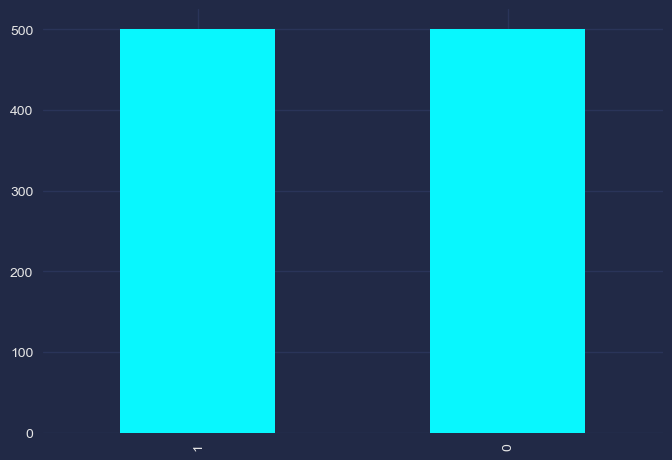

In [5]:
df["Quitting"].value_counts().plot.bar();

<Figure size 4000x3000 with 0 Axes>

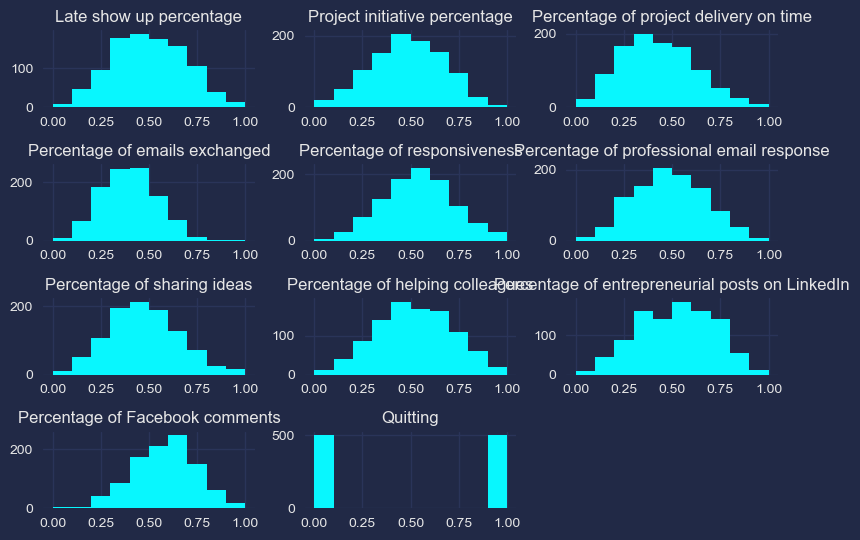

In [6]:
# show the freature distriutions
plt.figure(figsize=(20,15),dpi=200)
df.hist();
plt.tight_layout();

<Axes: >

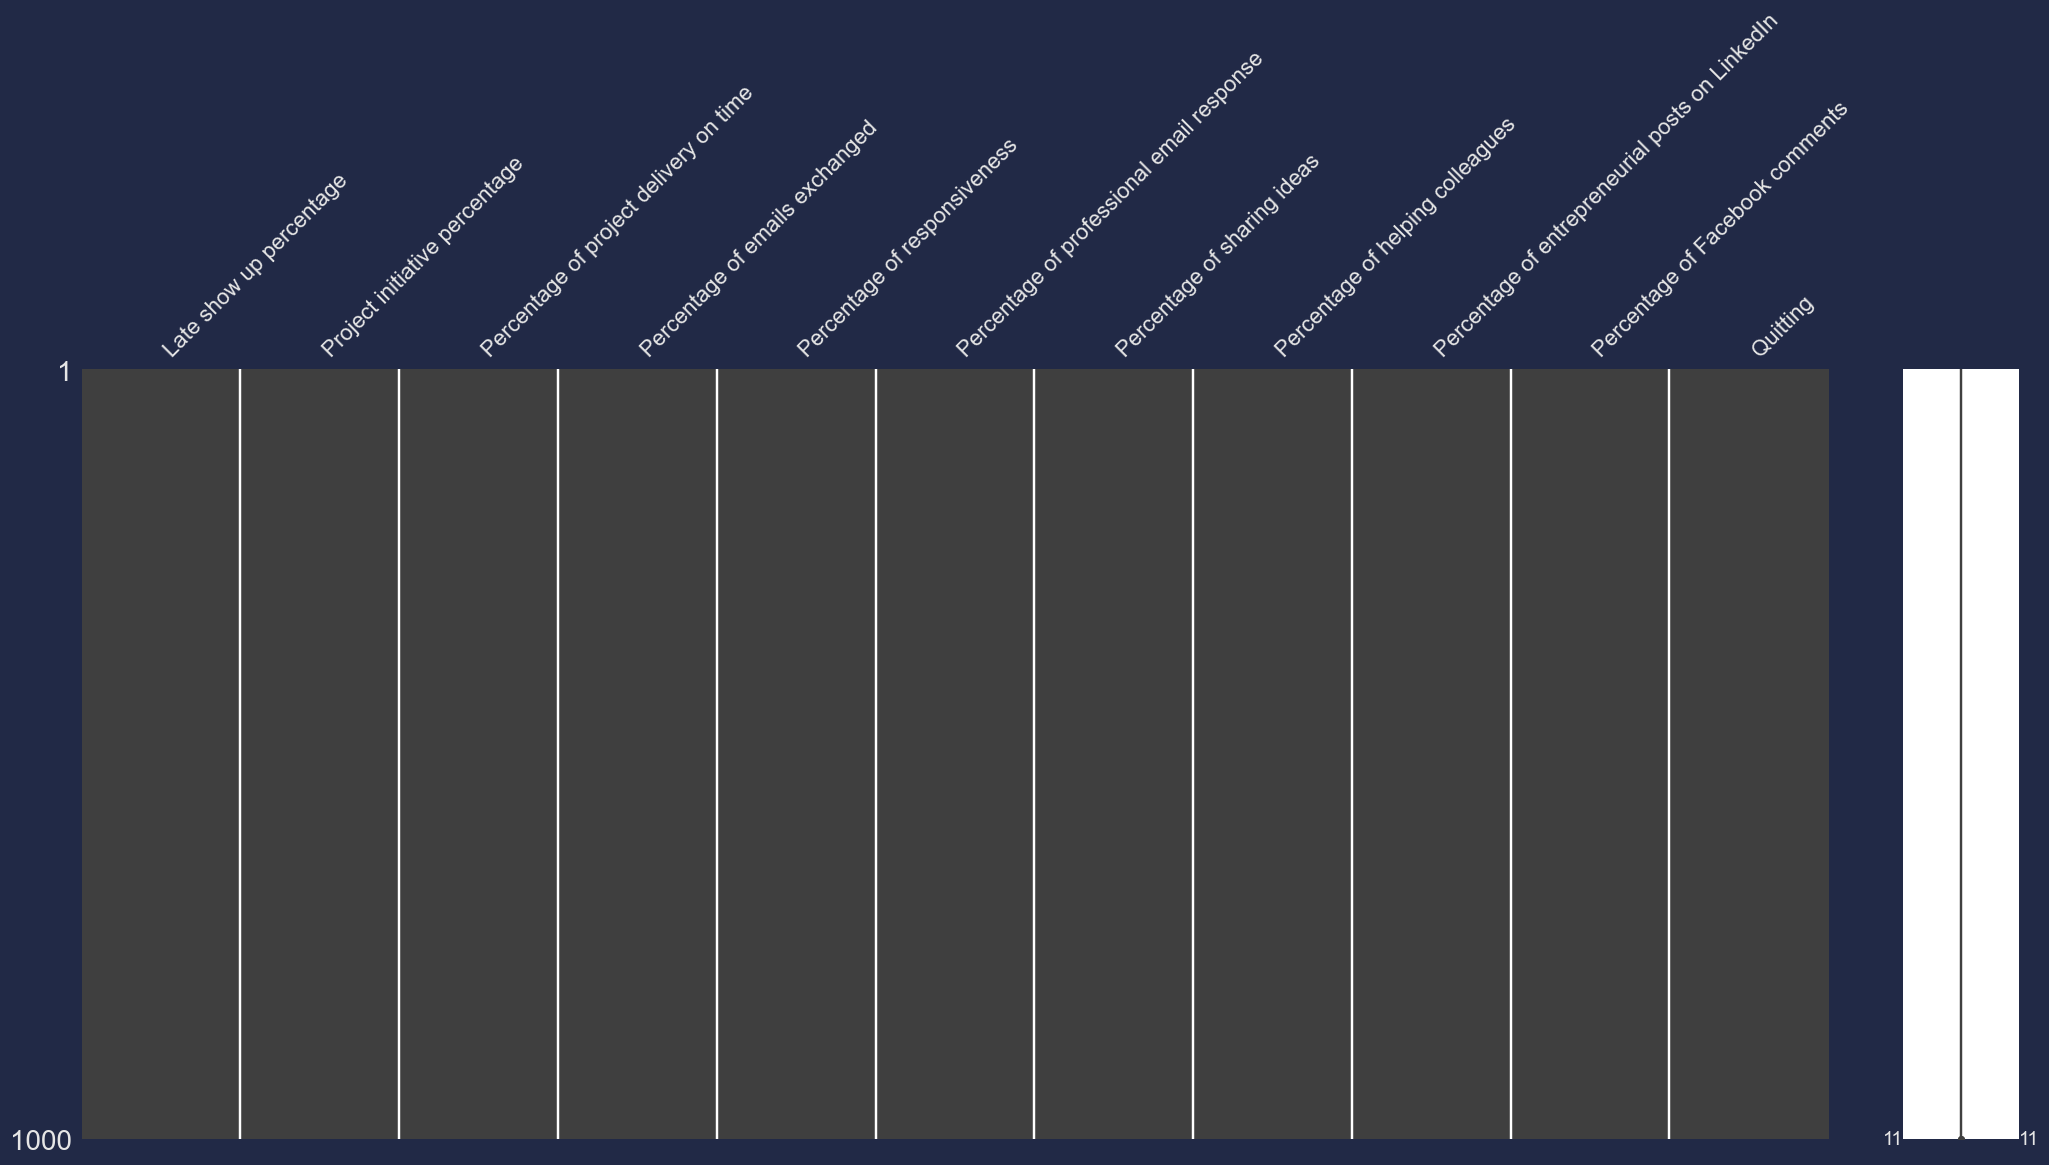

In [7]:
# have a look at missing data
ms.matrix(df)

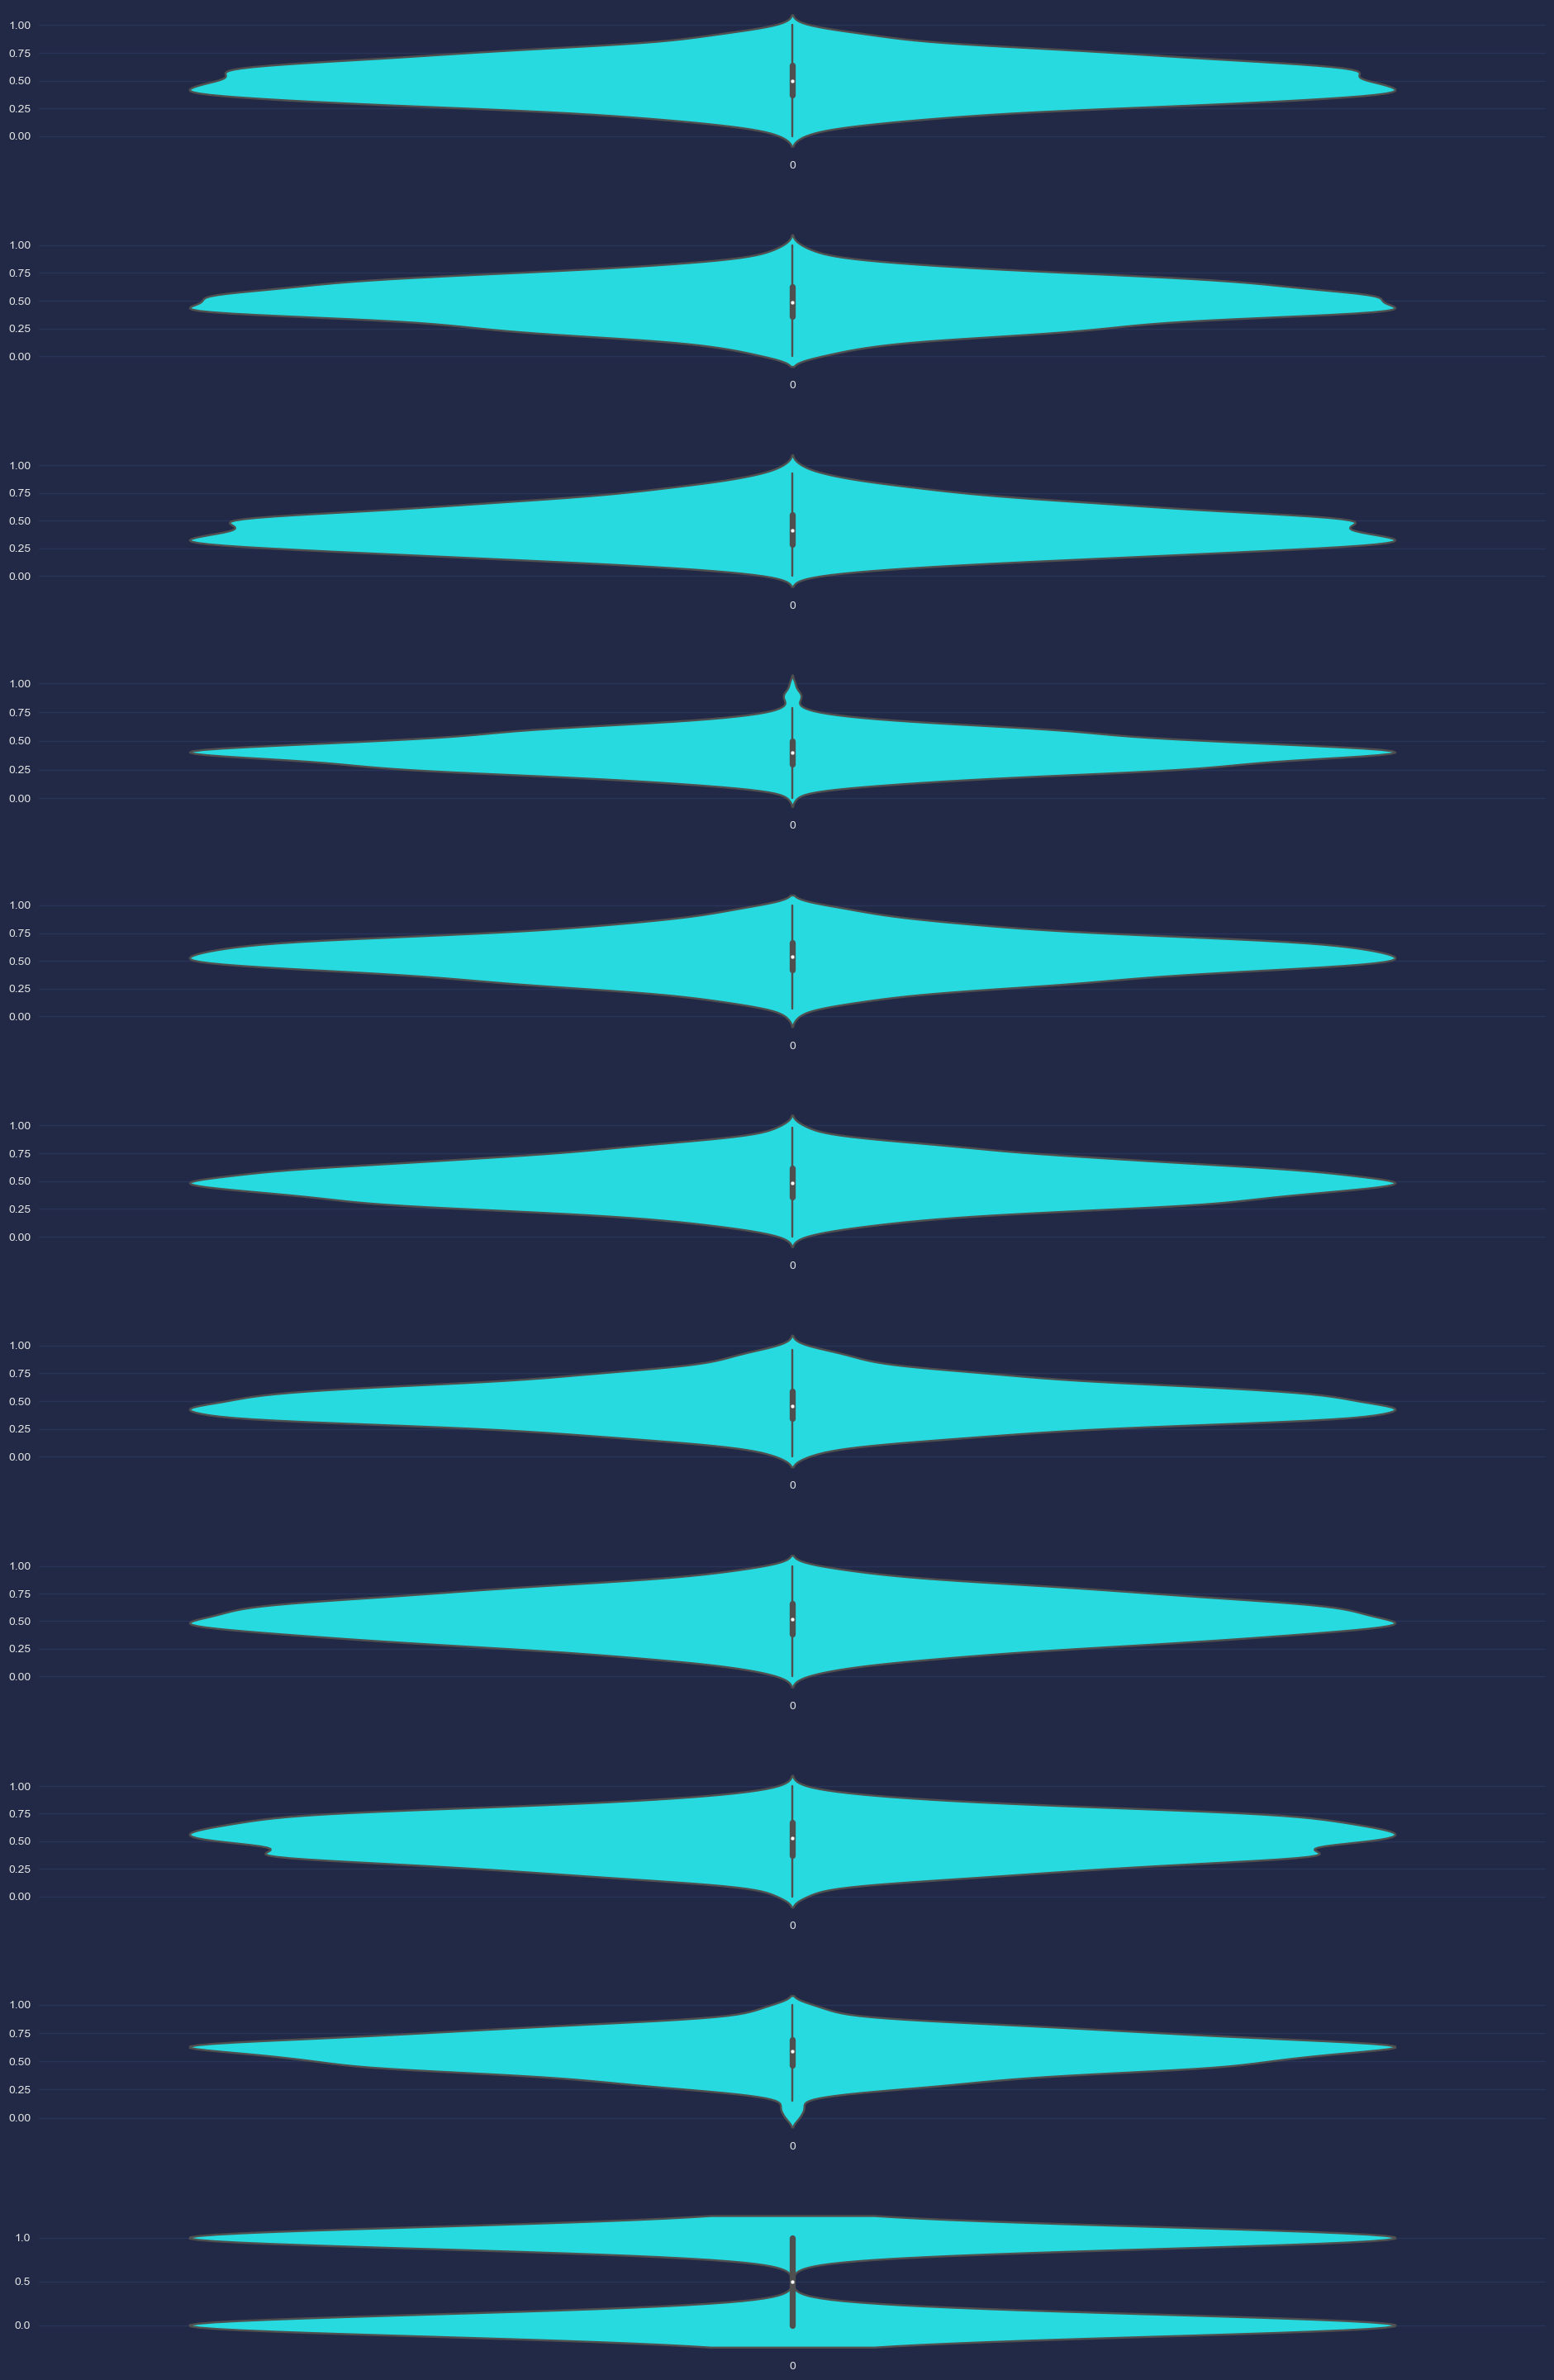

In [8]:
#
plt.figure(figsize=(20,30))
for i,col in enumerate(df.columns):
    plt.subplot(len(df.columns),1,i+1)
    sns.violinplot(df[col])
    
    
plt.tight_layout(pad=5)

#### Show linear relationship between variables

# Modeling Step:

## Scaling the data 

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalar = StandardScaler()
X = df.drop(columns =["Quitting"])
y = df["Quitting"]
# fitting 
scalar.fit(X)
X_scaled = scalar.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


## Spliting the data 

In [11]:
# import train test split
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test , y_train, y_test = train_test_split( X , y, test_size=.3)

In [35]:
# show the length of each
len(X_train) , len(X_test)

(700, 300)

## Build the model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# import linearregression model
knn = KNeighborsClassifier(n_neighbors=4,metric="euclidean")
# fitting 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [38]:
# predict the x_test
y_pred = knn.predict(X_test)

## Evaluate the model

In [39]:
from sklearn.metrics import accuracy_score , classification_report

In [40]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy = {acc*100}")

Accuracy = 93.66666666666667


In [41]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

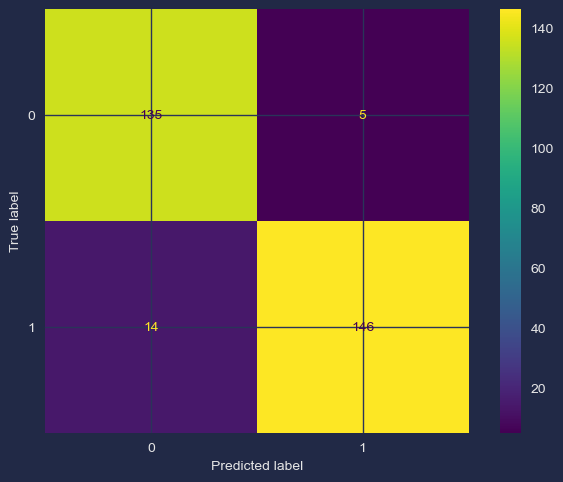

In [42]:
cm = confusion_matrix(y_test,y_pred,labels= knn.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cmd.plot();

In [43]:
ks = range(2,50)
accs = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accs.append(acc)
    
    

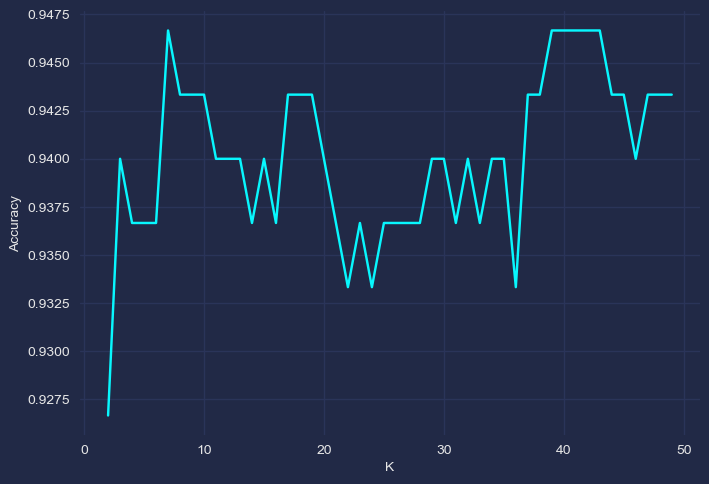

In [44]:
plt.plot(ks,accs)
plt.xlabel("K")
plt.ylabel("Accuracy");